# Downloading libraries

In [2]:
!pip install nltk

In [8]:
import pandas as pd


In [9]:
from collections import Counter

In [10]:
from nltk.tokenize import word_tokenize


In [11]:
import re
import nltk

In [12]:
from __future__ import division
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [13]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Mangesh
[nltk_data]     Shingare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mangesh Shingare\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
import sys

# Read the data set 


In [15]:
A = pd.read_csv('C:/Users/Mangesh Shingare/Desktop/imdb2.csv')

In [16]:
A.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [17]:
s= list(A['sentiment'])

In [18]:
Q= list(A['review'])


# Removing single letters and numerics from the reviews

In [19]:
#Removal Single/double letters

B = []
for i in range(len(Q)):
    p = ' '.join( [f for f in Q[i].split() if len(f)>2] )
    B.append(p)
print (B)


["One the other reviewers has mentioned that after watching just episode you'll hooked. They are right, this exactly what happened with me.<br /><br />The first thing that struck about was its brutality and unflinching scenes violence, which set right from the word GO. Trust me, this not show for the faint hearted timid. This show pulls punches with regards drugs, sex violence. Its hardcore, the classic use the word.<br /><br />It called that the nickname given the Oswald Maximum Security State Penitentary. focuses mainly Emerald City, experimental section the prison where all the cells have glass fronts and face inwards, privacy not high the agenda. City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal the show due the fact that goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forge

In [20]:
#Remove all special characters, punctuation and spaces from string

Z = []
for i in range(len(B)):
    q = ' '.join(e for e in B[i].split() if e.isalnum())
    Z.append(q)

In [21]:
#Removing Numbers

w1 = []
for i in range(len(Z)):
    ss = ' '.join([i for i in Z[i].split() if not i.isdigit()])
    w1.append(ss)

In [22]:
len(w1[0])

1131

# Snippet to tag the parts of speech for each review

In [24]:
p1 = []
for r in w1:
    tokenized = nltk.word_tokenize(r)
    tagged = nltk.pos_tag(tokenized)
    p1.append(tagged)
print (p1)

[[('One', 'CD'), ('the', 'DT'), ('other', 'JJ'), ('reviewers', 'NNS'), ('has', 'VBZ'), ('mentioned', 'VBN'), ('that', 'IN'), ('after', 'IN'), ('watching', 'VBG'), ('just', 'RB'), ('episode', 'NN'), ('They', 'PRP'), ('are', 'VBP'), ('this', 'DT'), ('exactly', 'RB'), ('what', 'WP'), ('happened', 'VBD'), ('with', 'IN'), ('first', 'JJ'), ('thing', 'NN'), ('that', 'WDT'), ('struck', 'VBD'), ('about', 'RB'), ('was', 'VBD'), ('its', 'PRP$'), ('brutality', 'NN'), ('and', 'CC'), ('unflinching', 'NN'), ('scenes', 'NNS'), ('which', 'WDT'), ('set', 'VBP'), ('right', 'NN'), ('from', 'IN'), ('the', 'DT'), ('word', 'NN'), ('Trust', 'NNP'), ('this', 'DT'), ('not', 'RB'), ('show', 'VB'), ('for', 'IN'), ('the', 'DT'), ('faint', 'NN'), ('hearted', 'VBD'), ('This', 'DT'), ('show', 'NN'), ('pulls', 'VBZ'), ('punches', 'NNS'), ('with', 'IN'), ('regards', 'NNS'), ('sex', 'NN'), ('Its', 'PRP$'), ('the', 'DT'), ('classic', 'JJ'), ('use', 'NN'), ('the', 'DT'), ('called', 'VBN'), ('that', 'IN'), ('the', 'DT'), (

# Narrow down each review with only adjectives and verb, adverb forms


In [25]:
q = []
allowed=["JJ","VBN", "VBD", "VB", "VBG", "RB"]
for i in range(len(p1)):
    d = ' '.join([w[0] for w in p1[i] if w[1] in allowed])
    q.append(d)
print(q)

['other mentioned watching just exactly happened first struck about was not show hearted classic called given mainly experimental not high shady never far say main due other pretty painted mainstream first ever saw struck nasty was was ready watched developed got accustomed high graphic Not just injustice sold kill get away well middle being turned due lack Watching become comfortable uncomfortable get touch', 'wonderful little very very sometimes sense entire extremely well not only got pat truly see editing guided not only well written performed masterful great really little rather use traditional solid then particularly concerning flat decorating terribly well', 'was wonderful spend too hot sitting conditioned watching likable suspected serial disappointed not thought was still fully control many grown was laughed never been impressed managed tone jumped right spirited young not was interesting great', 'Basically little boy zombie fighting become kill first going Decide divorcing ar

In [26]:
G = pd.DataFrame(q) 

In [27]:
G.to_csv("middle_check1.csv", sep=',', encoding='utf-8')

In [28]:
GG = q #Reviews with adjectives and all verb forms

# Making a list of tuples which has review and its respective class

In [29]:
u = []
for i in range(500):
    p = (s[i],q[i])
    u.append(p)
u

[('positive',
  'other mentioned watching just exactly happened first struck about was not show hearted classic called given mainly experimental not high shady never far say main due other pretty painted mainstream first ever saw struck nasty was was ready watched developed got accustomed high graphic Not just injustice sold kill get away well middle being turned due lack Watching become comfortable uncomfortable get touch'),
 ('positive',
  'wonderful little very very sometimes sense entire extremely well not only got pat truly see editing guided not only well written performed masterful great really little rather use traditional solid then particularly concerning flat decorating terribly well'),
 ('positive',
  'was wonderful spend too hot sitting conditioned watching likable suspected serial disappointed not thought was still fully control many grown was laughed never been impressed managed tone jumped right spirited young not was interesting great'),
 ('negative',
  'Basically litt

# Seperating the data set by each class i.e. "Pos", "Neg", "Neutral"

In [30]:
a = []
b = []
c = []
allowed=["positive","negative","neutral"]
for w in u:
    if w[0] in allowed[0]:
        a.append(w[1])
    elif w[0] in allowed[1]:
        b.append(w[1])
    elif w[0] in allowed[2]:
        c.append(w[1])



# Merge the reviews in each class in to three single lists

The idea is to extract combined information for each class independently

In [32]:
M = [' '.join(w for w in a)]
N = [' '.join(w for w in b)]
O = [' '.join(w for w in c)]

In [87]:
len(M)
print(M)

['other mentioned watching just exactly happened first struck about was not show hearted classic called given mainly experimental not high shady never far say main due other pretty painted mainstream first ever saw struck nasty was was ready watched developed got accustomed high graphic Not just injustice sold kill get away well middle being turned due lack Watching become comfortable uncomfortable get touch wonderful little very very sometimes sense entire extremely well not only got pat truly see editing guided not only well written performed masterful great really little rather use traditional solid then particularly concerning flat decorating terribly well was wonderful spend too hot sitting conditioned watching likable suspected serial disappointed not thought was still fully control many grown was laughed never been impressed managed tone jumped right spirited young not was interesting great Petter visually stunning vivid human telling different being same present different conne

# Splitting the words in each list to get the word frequencies

In [33]:
pos_list = M[0].split()
neg_list = N[0].split()
neu_list = O[0].split()
print(pos_list)

['other', 'mentioned', 'watching', 'just', 'exactly', 'happened', 'first', 'struck', 'about', 'was', 'not', 'show', 'hearted', 'classic', 'called', 'given', 'mainly', 'experimental', 'not', 'high', 'shady', 'never', 'far', 'say', 'main', 'due', 'other', 'pretty', 'painted', 'mainstream', 'first', 'ever', 'saw', 'struck', 'nasty', 'was', 'was', 'ready', 'watched', 'developed', 'got', 'accustomed', 'high', 'graphic', 'Not', 'just', 'injustice', 'sold', 'kill', 'get', 'away', 'well', 'middle', 'being', 'turned', 'due', 'lack', 'Watching', 'become', 'comfortable', 'uncomfortable', 'get', 'touch', 'wonderful', 'little', 'very', 'very', 'sometimes', 'sense', 'entire', 'extremely', 'well', 'not', 'only', 'got', 'pat', 'truly', 'see', 'editing', 'guided', 'not', 'only', 'well', 'written', 'performed', 'masterful', 'great', 'really', 'little', 'rather', 'use', 'traditional', 'solid', 'then', 'particularly', 'concerning', 'flat', 'decorating', 'terribly', 'well', 'was', 'wonderful', 'spend', 'to

In [40]:
print ("Word count in positive class: {} , Word count in negative class: {} and Word count in neutral class: {}" .format(len(pos_list), len(neg_list), len(neu_list)))

Word count in positive class: 11088 , Word count in negative class: 12071 and Word count in neutral class: 0


# Finding the frequencies of the unique words in each class

In [34]:
counts_pos = Counter(pos_list)
counts_neg = Counter(neg_list)
counts_neu = Counter(neu_list)


In [46]:
pos_freq_list = list(counts_pos.items())
neg_freq_list = list(counts_neg.items())
neu_freq_list = list(counts_neu.items())
print(pos_freq_list)

[('other', 66), ('mentioned', 6), ('watching', 21), ('just', 128), ('exactly', 10), ('happened', 6), ('first', 72), ('struck', 7), ('about', 9), ('was', 412), ('not', 224), ('show', 3), ('hearted', 1), ('classic', 13), ('called', 11), ('given', 20), ('mainly', 5), ('experimental', 2), ('high', 17), ('shady', 1), ('never', 63), ('far', 24), ('say', 16), ('main', 15), ('due', 13), ('pretty', 31), ('painted', 1), ('mainstream', 2), ('ever', 27), ('saw', 14), ('nasty', 3), ('ready', 4), ('watched', 20), ('developed', 7), ('got', 39), ('accustomed', 2), ('graphic', 3), ('Not', 19), ('injustice', 1), ('sold', 2), ('kill', 11), ('get', 49), ('away', 19), ('well', 65), ('middle', 5), ('being', 65), ('turned', 8), ('lack', 3), ('Watching', 3), ('become', 21), ('comfortable', 4), ('uncomfortable', 1), ('touch', 5), ('wonderful', 22), ('little', 79), ('very', 146), ('sometimes', 9), ('sense', 2), ('entire', 12), ('extremely', 11), ('only', 90), ('pat', 1), ('truly', 18), ('see', 49), ('editing', 

In [47]:
print ("Total unique words in positive class: {} , Total unique words in negative class: {} and Total unique words in neutral class: {}" .format(len(pos_freq_list), len(neg_freq_list), len(neu_freq_list)))

Total unique words in positive class: 3029 , Total unique words in negative class: 2957 and Total unique words in neutral class: 0


# Snippet to set the dictionary size

In [35]:
pos_dict = []
for w in pos_freq_list:
    if w[1]>0:
        pos_dict.append(w[0])
neg_dict = []
for f in neg_freq_list:
    if f[1]>0:
        neg_dict.append(f[0])
neu_dict = []
for x in neu_freq_list:
    if x[1]>0:
        neu_dict.append(x[0])


        
### In this case we've have included all the unique words in the dictionary

NameError: name 'pos_freq_list' is not defined

In [51]:
print ("Dictionary size of positive class: {} , Dictionary size of negative class: {} and Dictionary size of neutral class: {}" .format(len(pos_dict), len(neg_dict), len(neu_dict)))

Dictionary size of positive class: 3029 , Dictionary size of negative class: 2957 and Dictionary size of neutral class: 0


# Identifying the similar words for each class in each review 

In [53]:
I = []
aa = 0
for i in range(500):
    pos_match = []
    for w in GG[i].split():
        if w in pos_dict:
            pos_match.append(w)
            aa = len(pos_match)
    I.append(aa)
print(I)

# I has the list of positive words in each review 

[63, 37, 35, 18, 33, 20, 24, 41, 24, 9, 21, 36, 78, 25, 6, 21, 26, 32, 28, 28, 55, 33, 13, 45, 31, 21, 114, 21, 26, 123, 66, 52, 17, 131, 52, 58, 10, 60, 14, 32, 23, 41, 22, 40, 33, 46, 11, 21, 107, 14, 77, 141, 20, 16, 24, 35, 37, 17, 100, 71, 55, 22, 20, 10, 27, 50, 46, 44, 38, 48, 29, 56, 52, 39, 33, 29, 52, 91, 17, 64, 30, 29, 47, 102, 15, 42, 40, 27, 29, 57, 33, 34, 66, 29, 18, 37, 37, 22, 26, 103, 29, 125, 32, 79, 25, 32, 18, 38, 35, 26, 21, 33, 6, 19, 51, 21, 59, 19, 25, 38, 15, 30, 18, 28, 19, 26, 76, 17, 38, 27, 54, 80, 18, 25, 24, 88, 17, 49, 66, 46, 47, 30, 110, 12, 31, 81, 37, 70, 45, 50, 25, 28, 25, 60, 35, 14, 140, 22, 34, 32, 13, 35, 18, 66, 87, 8, 28, 31, 20, 58, 29, 33, 113, 64, 41, 42, 37, 87, 50, 38, 30, 24, 88, 47, 11, 50, 97, 18, 33, 72, 45, 156, 21, 9, 35, 27, 28, 26, 87, 22, 20, 36, 57, 18, 30, 14, 12, 33, 32, 17, 74, 11, 19, 13, 18, 71, 46, 21, 94, 31, 20, 49, 41, 56, 44, 55, 49, 42, 110, 30, 9, 9, 31, 11, 27, 37, 11, 22, 53, 23, 24, 25, 22, 28, 19, 6, 24, 31, 3

In [54]:
J = []
bb = 0
for i in range(500):
    neg_match = []  
    for w in GG[i].split():
        if w in neg_dict:
            neg_match.append(w)
            bb = len(neg_match)
    J.append(bb)
    
print(J)
# J has the list of negative words in each review 

[58, 30, 30, 25, 25, 17, 22, 46, 27, 8, 22, 38, 90, 26, 6, 32, 24, 38, 28, 33, 45, 36, 11, 53, 33, 20, 93, 25, 29, 88, 44, 42, 21, 104, 60, 67, 13, 72, 13, 45, 27, 29, 28, 55, 25, 44, 14, 29, 77, 25, 57, 117, 17, 14, 39, 40, 42, 25, 73, 63, 57, 31, 18, 13, 34, 41, 62, 46, 42, 56, 35, 64, 42, 34, 45, 28, 47, 110, 26, 51, 24, 32, 56, 116, 16, 43, 44, 31, 38, 64, 24, 41, 52, 22, 19, 22, 45, 26, 29, 89, 26, 147, 27, 46, 32, 24, 16, 49, 28, 25, 30, 41, 6, 17, 42, 18, 41, 22, 25, 48, 14, 22, 28, 34, 15, 30, 88, 22, 38, 24, 46, 69, 22, 28, 32, 99, 16, 56, 58, 58, 64, 39, 123, 10, 37, 80, 31, 52, 47, 62, 22, 35, 34, 52, 41, 19, 193, 20, 36, 31, 13, 42, 18, 84, 81, 11, 26, 47, 21, 73, 39, 35, 91, 47, 46, 53, 30, 128, 41, 48, 21, 25, 114, 56, 14, 62, 85, 21, 31, 86, 35, 108, 16, 8, 41, 33, 38, 34, 72, 27, 26, 22, 42, 18, 37, 12, 13, 38, 30, 13, 98, 12, 23, 10, 21, 63, 32, 24, 72, 34, 21, 47, 34, 64, 31, 59, 36, 34, 79, 28, 12, 6, 28, 9, 24, 28, 11, 25, 44, 30, 26, 22, 25, 23, 26, 6, 30, 34, 32, 

In [56]:
K = []
cc = 0
for i in range(500):
    neu_match = []   
    for w in GG[i].split():
        if w in neu_dict:
            neu_match.append(w)
            cc = len(neu_match)
    K.append(cc)
# K has the list of neutral words in each review 

# Calculating the weights of positive, negative and neutral words in each review

In [67]:
PW = []
NGW = []
NUW = []
for w in range(500):
    pos_wt = 0
    neg_wt = 0
    neu_wt = 0
    z = 0
    z = len(GG[w].split())
    pos_wt = I[w]/z
    neg_wt = J[w]/z
    neu_wt = K[w]/z
    PW.append(pos_wt)
    NGW.append(neg_wt)
    NUW.append(neu_wt)


In [69]:
PW_1 = []
NGW_1 = []
NUW_1 = []
for i in range(500):
    x_pw = PW[i]
    y_ngw = NGW[i]
    z_nuw = NUW[i]
    g = float("{0:.2f}".format(x_pw))
    PW_1.append(g)
    h = float("{0:.2f}".format(y_ngw))
    NGW_1.append(h)
    i = float("{0:.2f}".format(z_nuw))
    NUW_1.append(i)
print(PW_1)

[1.0, 1.0, 1.0, 0.72, 1.0, 1.0, 1.0, 0.89, 0.89, 1.0, 0.95, 0.95, 0.87, 0.96, 1.0, 0.66, 1.0, 0.84, 1.0, 0.85, 1.0, 0.92, 1.0, 0.85, 0.94, 1.0, 1.0, 0.84, 0.9, 1.0, 1.0, 1.0, 0.81, 1.0, 0.87, 0.87, 0.77, 0.83, 1.0, 0.71, 0.85, 1.0, 0.79, 0.73, 1.0, 1.0, 0.79, 0.72, 1.0, 0.56, 1.0, 1.0, 1.0, 1.0, 0.62, 0.88, 0.88, 0.68, 1.0, 1.0, 0.96, 0.71, 1.0, 0.77, 0.79, 1.0, 0.74, 0.96, 0.9, 0.86, 0.83, 0.88, 1.0, 1.0, 0.73, 1.0, 1.0, 0.83, 0.65, 1.0, 1.0, 0.91, 0.84, 0.88, 0.94, 0.98, 0.91, 0.87, 0.76, 0.89, 1.0, 0.83, 1.0, 1.0, 0.95, 1.0, 0.82, 0.85, 0.9, 1.0, 1.0, 0.85, 1.0, 1.0, 0.78, 1.0, 1.0, 0.78, 1.0, 1.0, 0.7, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.86, 1.0, 0.79, 1.0, 1.0, 0.64, 0.82, 1.0, 0.87, 0.86, 0.77, 1.0, 1.0, 1.0, 1.0, 0.82, 0.89, 0.75, 0.89, 1.0, 0.88, 1.0, 0.79, 0.73, 0.77, 0.89, 1.0, 0.84, 1.0, 1.0, 1.0, 0.96, 0.81, 1.0, 0.8, 0.74, 1.0, 0.85, 0.74, 0.73, 1.0, 0.94, 1.0, 1.0, 0.83, 1.0, 0.79, 1.0, 0.73, 1.0, 0.66, 0.95, 0.79, 0.74, 0.94, 1.0, 1.0, 0.89, 0.79, 1.0, 0.68, 1.0, 0.79, 1.0, 

In [73]:
print (PW_1[499])

1.0


# Creating a data frame with respective weigths

In [74]:
UL = pd.DataFrame()

In [75]:
UL['POS']= PW_1

In [76]:
UL['NEG']= NGW_1

In [77]:
UL['NEU']= NUW_1

In [78]:
UL['truth']=A['sentiment']

In [79]:
UL['PRE'] = A['review']

In [80]:
UL.head(5)

POS   NEG  NEU     truth  \
0  1.00  0.92  0.0  positive   
1  1.00  0.81  0.0  positive   
2  1.00  0.86  0.0  positive   
3  0.72  1.00  0.0  negative   
4  1.00  0.76  0.0  positive   

                                                 PRE  
0  One of the other reviewers has mentioned that ...  
1  A wonderful little production. <br /><br />The...  
2  I thought this was a wonderful way to spend ti...  
3  Basically there's a family where a little boy ...  
4  Petter Mattei's "Love in the Time of Money" is...

# Predicting the class based the weights.

In [81]:
for i in range(500):
    if (UL.POS[i]-UL.NEG[i] > 0.03):
        UL.PRE[i] = 'positive'
    if (UL.POS[i]-UL.NEG[i] < -0.03):
        UL.PRE[i] = 'negative'
    elif (UL.POS[i]-UL.NEG[i] <= 0.03 and UL.POS[i]-UL.NEG[i] >= -0.03):
        UL.PRE[i] = 'neutral'

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
F:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [82]:
UL.head(5)

POS   NEG  NEU     truth       PRE
0  1.00  0.92  0.0  positive  positive
1  1.00  0.81  0.0  positive  positive
2  1.00  0.86  0.0  positive  positive
3  0.72  1.00  0.0  negative  negative
4  1.00  0.76  0.0  positive  positive

In [83]:
pd.crosstab(UL.truth,UL.PRE)

PRE       negative  neutral  positive
truth                                
negative       257        6         0
positive         0       14       223

In [88]:
print (accuracy_score (UL.truth,UL.PRE))

0.96


In [89]:
print (recall_score(UL.truth,UL.PRE, pos_label= 'negative', average='micro'))

0.96


F:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'negative') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [90]:
UL.to_csv("ultimate1.csv", sep=',', encoding='utf-8')

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [5]:
a = pd.read_csv('C:/Users/Mangesh Shingare/ultimate1.csv')

In [6]:
a.head()

Unnamed: 0   POS   NEG  NEU     truth       PRE
0           0  1.00  0.92  0.0  positive  positive
1           1  1.00  0.81  0.0  positive  positive
2           2  1.00  0.86  0.0  positive  positive
3           3  0.72  1.00  0.0  negative  negative
4           4  1.00  0.76  0.0  positive  positive

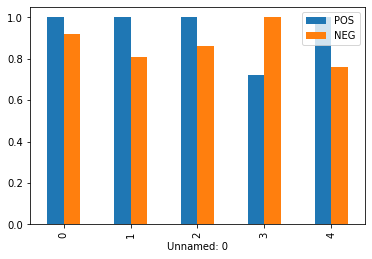

In [7]:
a.head().plot.bar(y=['POS','NEG'],x='Unnamed: 0')